# The Math behind the PCA

---

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
data = pd.DataFrame({
    'Feature_1': [-83, 10111, 1303, -150, 701],
    'Feature_2': [-5, 22, 33, 97, 919],
    'Feature_3': [5, 9, 133, 20, 33],
    'Feature_4': [-227, -39, -431, 196, 620],
    'Feature_5': [-2271, -329, -4321, 196, 6201],
}, index=['p1', 'p2', 'p3', 'p4', 'p5'])

data

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
p1,-83,-5,5,-227,-2271
p2,10111,22,9,-39,-329
p3,1303,33,133,-431,-4321
p4,-150,97,20,196,196
p5,701,919,33,620,6201


## Steps

---

#### 1. Looking for mean values of all features

This line computes the mean value for each feature in the dataset 

and appends these values as a new row labeled "Mean Values" at the bottom of the DataFrame. 

This provides a quick reference for the average of each column and is used as the first step in centering the data for PCA.

In [49]:
data.loc['Mean Values'] = data.mean()
data_mean = data.copy()
data_mean

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
p1,-83.0,-5.0,5.0,-227.0,-2271.0
p2,10111.0,22.0,9.0,-39.0,-329.0
p3,1303.0,33.0,133.0,-431.0,-4321.0
p4,-150.0,97.0,20.0,196.0,196.0
p5,701.0,919.0,33.0,620.0,6201.0
Mean Values,2376.4,213.2,40.0,23.8,-104.8


#### 2. Subtract row/feature value - mean value

This loop centers the dataset by subtracting the mean of each feature from every corresponding value. 

The operation is applied only to the original data rows (iloc[:-1]), excluding the last row that contains the previously calculated mean values. 

Centering the data in this way ensures that each feature has a mean of zero, which is a required preprocessing step for PCA.

In [50]:
for f in data_mean.columns:
    data.iloc[:-1] = data.iloc[:-1] - data.iloc[:-1].mean()

data_mean

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
p1,-83.0,-5.0,5.0,-227.0,-2271.0
p2,10111.0,22.0,9.0,-39.0,-329.0
p3,1303.0,33.0,133.0,-431.0,-4321.0
p4,-150.0,97.0,20.0,196.0,196.0
p5,701.0,919.0,33.0,620.0,6201.0
Mean Values,2376.4,213.2,40.0,23.8,-104.8


This line computes the mean of the centered data and adds it as a new row labeled `Mean after calc`. 

Since the last two rows contain summary statistics rather than original observations, only the actual data rows (iloc[:-1]) are included in the calculation. 

This step verifies that the centering process was successful by confirming that the mean of each feature is effectively zero.

In [51]:
data_mean.iloc[:-1] = data_mean.iloc[:-1] - data_mean.loc['Mean Values']
data_mean.loc['Mean After Calc'] = data_mean.iloc[:-1].mean()
data_mean

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
p1,-2.459400e+03,-218.2,-35.0,-250.8,-2.166200e+03
p2,7.734600e+03,-191.2,-31.0,-62.8,-2.242000e+02
p3,-1.073400e+03,-180.2,93.0,-454.8,-4.216200e+03
p4,-2.526400e+03,-116.2,-20.0,172.2,3.008000e+02
p5,-1.675400e+03,705.8,-7.0,596.2,6.305800e+03
Mean Values,2.376400e+03,213.2,40.0,23.8,-1.048000e+02
Mean After Calc,1.818989e-13,0.0,0.0,0.0,1.818989e-13


This block generates a 2D scatter plot of the first two centered features. 

The plot visualizes how the observations are distributed along these two dimensions after mean-centering. 

Only the original data rows (iloc[:-2]) are included, excluding the summary rows used for statistical validation. 

The axis labels are dynamically assigned based on the feature names, providing a clear view of the data structure in two-dimensional space.

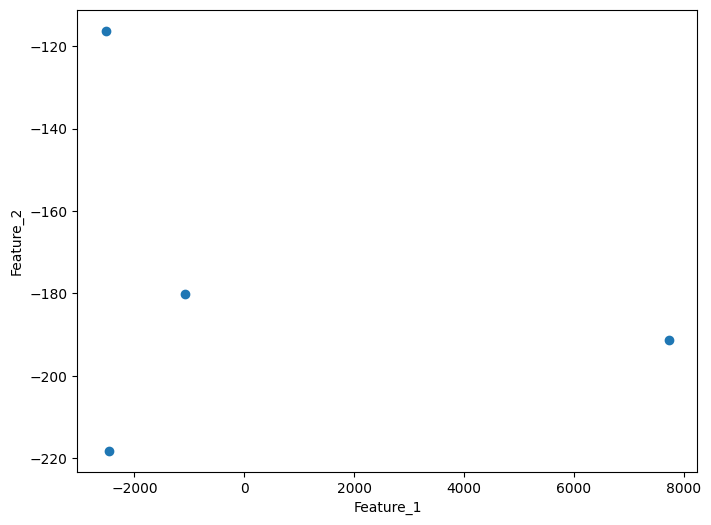

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:-2, 0], data.iloc[:-2, 1])
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.show()

### 3. Calculate covariation metrix

This step calculates the covariance matrix using all data rows except the last two.

In [53]:
cov_matrix = data.iloc[:-2].cov()
cov_matrix

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
Feature_1,2.423528e+07,-53198.583333,-68641.250000,144646.416667,3.333456e+06
Feature_2,-5.319858e+04,1868.250000,121.583333,7825.916667,4.255992e+04
Feature_3,-6.864125e+04,121.583333,3740.916667,-11324.083333,-1.014401e+05
Feature_4,1.446464e+05,7825.916667,-11324.083333,71492.250000,5.289362e+05
Feature_5,3.333456e+06,42559.916667,-101440.083333,528936.250000,4.222911e+06


### 4. Looking for eigenvalues and eigenvectors

We do this step to identify the principal components, since PCA is based on the `eigenvalues` and `eigenvectors` of the covariance matrix.

In [54]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [55]:
eig_vals

array([ 2.47783881e+07,  3.75274550e+06,  4.15500044e+03, -3.96293101e-12,
        1.42357421e-11])

In [56]:
eig_vecs

array([[ 9.87015681e-01, -1.60084109e-01,  9.93200002e-03,
        -4.46244363e-03,  3.01909648e-04],
       [-1.84098695e-03,  1.36416573e-02,  5.11222712e-01,
        -6.63248729e-01, -8.54079149e-01],
       [-3.39527322e-03, -2.39242929e-02,  5.60923380e-01,
         7.38864178e-01,  4.14948444e-01],
       [ 9.21150569e-03,  1.34269207e-01,  6.46091110e-01,
        -1.11376975e-01,  3.12939878e-01],
       [ 1.60313061e-01,  9.77540992e-01, -8.05228791e-02,
         4.19059117e-02, -2.08599489e-02]])

In [57]:
idx = np.argsort(eig_vals)[::-1]
idx

array([0, 1, 2, 4, 3])

This step sorts the eigenvalues in descending order so we can rank the principal components by importance.

In [58]:
eig_vals_sorted = eig_vals[idx]
eig_vals_sorted

array([ 2.47783881e+07,  3.75274550e+06,  4.15500044e+03,  1.42357421e-11,
       -3.96293101e-12])

In [59]:
eig_vecs_sorted = eig_vecs[:, idx]
eig_vecs_sorted

array([[ 9.87015681e-01, -1.60084109e-01,  9.93200002e-03,
         3.01909648e-04, -4.46244363e-03],
       [-1.84098695e-03,  1.36416573e-02,  5.11222712e-01,
        -8.54079149e-01, -6.63248729e-01],
       [-3.39527322e-03, -2.39242929e-02,  5.60923380e-01,
         4.14948444e-01,  7.38864178e-01],
       [ 9.21150569e-03,  1.34269207e-01,  6.46091110e-01,
         3.12939878e-01, -1.11376975e-01],
       [ 1.60313061e-01,  9.77540992e-01, -8.05228791e-02,
        -2.08599489e-02,  4.19059117e-02]])

We take only the first two eigenvectors because they correspond to the two largest eigenvalues and therefore capture the most variance in the data, giving us the 2-dimensional PCA projection.

In [60]:
W = eig_vecs_sorted[:, :2]
W

array([[ 0.98701568, -0.16008411],
       [-0.00184099,  0.01364166],
       [-0.00339527, -0.02392429],
       [ 0.00921151,  0.13426921],
       [ 0.16031306,  0.97754099]])

Here the two matrices are multiplied: the centered data matrix is multiplied by the matrix of selected eigenvectors to produce the PCA-transformed data.

In [61]:
X_centered = data_mean.iloc[:-2]              
Z = np.dot(X_centered, W)                
Z

array([[-2776.52622452, -1759.65241727],
       [ 7598.10806205, -1467.64997495],
       [-1739.54796539, -4015.42287078],
       [-2443.50619721,   720.49530518],
       [ -638.52767494,  6522.22995782]])

In [62]:
Z = pd.DataFrame(Z, columns=['PC1', 'PC2'])
Z

,PC1,PC2
0,-2776.526225,-1759.652417
1,7598.108062,-1467.649975
2,-1739.547965,-4015.422871
3,-2443.506197,720.495305
4,-638.527675,6522.229958


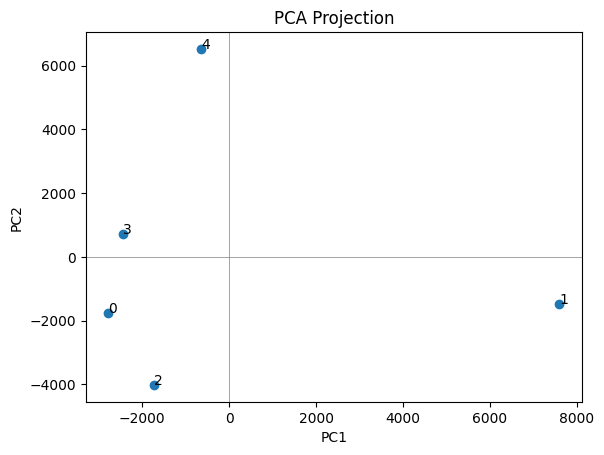

In [63]:
plt.scatter(Z['PC1'], Z['PC2'])

for i, label in enumerate(Z.index):
    plt.text(Z['PC1'][i], Z['PC2'][i], label)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)

plt.show()

In [64]:
loadings = pd.DataFrame(W, index=X_centered.columns, columns=['PC1','PC2'])
loadings

,PC1,PC2
Feature_1,0.987016,-0.160084
Feature_2,-0.001841,0.013642
Feature_3,-0.003395,-0.023924
Feature_4,0.009212,0.134269
Feature_5,0.160313,0.977541
